In [1]:
# Import our packages
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset Designing
We plan to create a function that generate dynamic dataset similar to this CSV file 

In [2]:
# read from csv file
# read data
df= pd.read_csv('https://raw.githubusercontent.com/Hala-Alsouly/Theatre/main/Theaters.csv')
df.head()

,Branch,Theater,Type,seats,AdultCost,ChildCost,SeniorCost,Movie,AgeRate,Shows
0,Riyadh,1,VIP,60,20,15,15,Limitless,PG-13,3
1,Riyadh,2,Standard,120,15,10,10,The Old Guard,R,2
2,Riyadh,3,Standard,120,15,10,10,Raya and the Last Dragon,PG,4
3,Riyadh,4,MAX,200,17,12,12,Rush Hour 3,PG-13,2
4,Riyadh,5,Standard,120,15,10,10,Focus,16,1


# Simulating a dynamic dataset as a real life dataset per/week

### Step 1: Use Movie, Branch, and Theaters Type list that used to create dataset

In [3]:
# Movie List
# DATA:         Movie Name  | Age Rating
movies = [["Limitless", "PG-13"], 
          ["Taken", "PG-13"], 
          ["The Old Guard", "R"],
          ["Mr. & Mrs. Smith", "PG-13"],
          ["Focus", "+16"],
          ["Raya and the Last Dragon", "PG"],
          ["Rush Hour 3", "PG-13"]]
# Branchs and size of the each branch based on the number of screens have
#  DATA:       Branch Location  | VIP | Standard | MAX
branchs =  [["Riyadh", 2, 5, 2], 
            ["Dammam", 1, 3, 1], 
            ["Jeddah", 1, 4, 1]]
# Theater Types based on capacity and ticket cost
# DATA:         Type Name  | Seats  | Adult Cost  | Child Cost | Senior Cost
theatersType = [["VIP",      60,  40, 30, 30],
                ["Standard", 120, 20, 15, 15],
                ["MAX",      180, 25, 20, 15]]

### Step 2: Create function to generate the dataset

In [4]:
# This function generate a theaters data set for multiple branch by passing branchs and theatersTypes
def generateDataSet(branchs, theatersType, movies):
    # Initialize the dataset columns to empty state
    branch_col = []
    theater_num_col = []
    type_col = []
    seats_col = []
    adult_cost_col = []
    child_cost_col = []
    senior_cost_col = []
    movie_name_col = []
    movie_rating_age_col = []
    show_number_col = []
    
    # Loop over branchs and theatersType to create dataset
    for row in range(len(branchs)):
        
        # Count theater number for each branch in total including all types of theater (VIP, Standard, Max)
        countTheater = 0
        screensCount = 0
        for col in range(1,len(branchs[row])):
            # total screen for each theater type and covert the string digit to integer number
            screensCount = branchs[row][col]

            # calculate the total of all screens for each branch
            countTheater += screensCount

            # Loading the data for each column
            type_col        += [theatersType[col-1][0] for i in range(screensCount)]
            seats_col       += [theatersType[col-1][1] for i in range(screensCount)]
            adult_cost_col  += [theatersType[col-1][2] for i in range(screensCount)]
            child_cost_col  += [theatersType[col-1][3] for i in range(screensCount)]
            senior_cost_col += [theatersType[col-1][4] for i in range(screensCount)]
        
        # Create random movies assign for each theater
        for movie in  range(countTheater):
            # Get a random movie form Movies List in the top
            random_movie_index = random.randrange(1, len(movies))

            # Loading and assign random movies to each theater
            movie_name_col.append(movies[random_movie_index][0])
            movie_rating_age_col.append(movies[random_movie_index][1])
            show_number_col.append(random.randrange(1, 4))

        # List of theaters number for all branch
        branch_col      += [branchs[row][0] for i in range(countTheater)]
        theater_num_col += [i for i in range(1,countTheater+1)]
        
    dataset = {
        "Branch"    : branch_col,
        "Theater"   : theater_num_col,
        "Type"      : type_col,
        "seats"     : seats_col,
        "AdultCost" : adult_cost_col,
        "ChildCost" : child_cost_col,
        "SeniorCost": senior_cost_col,
        "Movie"     : movie_name_col,
        "AgeRate"   : movie_rating_age_col,
        "Shows"     : show_number_col
    }
    return dataset

### Step 3: Call the generate function

In [5]:
#load data into a DataFrame object:
dataset = generateDataSet(branchs, theatersType, movies)
df = pd.DataFrame(dataset)
df

,Branch,Theater,Type,seats,AdultCost,ChildCost,SeniorCost,Movie,AgeRate,Shows
0,Riyadh,1,VIP,60,40,30,30,Mr. & Mrs. Smith,PG-13,2
1,Riyadh,2,VIP,60,40,30,30,Focus,+16,2
2,Riyadh,3,Standard,120,20,15,15,The Old Guard,R,1
3,Riyadh,4,Standard,120,20,15,15,Focus,+16,1
4,Riyadh,5,Standard,120,20,15,15,Taken,PG-13,1
5,Riyadh,6,Standard,120,20,15,15,Mr. & Mrs. Smith,PG-13,2
6,Riyadh,7,Standard,120,20,15,15,Taken,PG-13,3
7,Riyadh,8,MAX,180,25,20,15,The Old Guard,R,3
8,Riyadh,9,MAX,180,25,20,15,The Old Guard,R,1
9,Dammam,1,VIP,60,40,30,30,Taken,PG-13,3


# Create snacks that the customers can buy and randomize who buys which snack

In [6]:
################################## Snacks Function #####################################

# the function takes snacks data frame to store the sales on it, Branch name, theater number
# and takes number of visitors.It is return the total revenue of the day for a theater.
def snacksF(BranchName, TheaterN, visitorsN):
    #snacks prices
    prices= [6, 8, 10, 8, 7, 9]
    #create a vector of sold snacks
    snack = random.sample(range(15,visitorsN), 6)
    #calculate the sales of snacks for a screen
    snacksSales= np.array(snack) @ np.array(prices)
    #bind it with the branch and theater
    snack= [BranchName, TheaterN,snack]
    return snacksSales,snack

# Create discount functions: Sunday discount and Student and Senior discount.

In [7]:
# calculate the Discount for sunday: 35%
def sundayDiscount(ticketCost,people):
    total = ticketCost * people
    # calculate the Discount for senior and students: 35%
    discountedTicket = total * 0.35
    # calculate the total after apply the Discount
    total = total - discountedTicket
    return total

In [8]:
###### return revenue after discount
def discount(ticketCost,people):
    total = ticketCost * people
    #calculate the Discount for senior and students: 10%
    discountedTicket = total * 0.1
    # calculate the total after apply the Discount
    total = total - discountedTicket
    return total

# Functionality Cost per Show

In [9]:
# the cost depends on screen Type
def screenCost(theatreType):
    if theatreType == 'VIP':
        return 500
    elif theatreType == 'MAX':
        return 350
    else:
        return 250


In [10]:
def cost(visitors, Branch, theatreType):
    waterBill = 0        
    rent = 0 
    insurance = 0 
    employeeSalary= 200
    nOfEmployee = 0
    ElectricityBill=0
    
    # How much Employees and Water Bill
    if 10 <= visitors <= 20:
        nOfEmployee = 2
        waterBill = 50
    elif 21 <= visitors <= 40:
        nOfEmployee = 3
        waterBill = 55
    elif 41 <= visitors <= 60:
        nOfEmployee = 4
        waterBill = 60
    elif 61 <= visitors <= 80:
        nOfEmployee = 5
        waterBill = 70
    elif 81 <= visitors <= 100:
        nOfEmployee = 6
        waterBill = 75
    elif 101 <= visitors <= 120:
        nOfEmployee = 7
        waterBill = 80
    elif 121 <= visitors <= 140:
        nOfEmployee = 8
        waterBill = 90
    elif 141 <= visitors <= 160:
        nOfEmployee = 9
        waterBill = 95
    else:
        nOfEmployee = 10
        waterBill = 100
        
    totalofEmployee = employeeSalary * nOfEmployee
    
    # Cost of insurance, rent and ElectricityBill    
    if Branch == "Riyadh":
        insurance = 250
        rent = 100
        ElectricityBill = 200
    elif Branch == "Jeddah":
        insurance = 180 
        rent = 80
        ElectricityBill = 200
    else: # Dammam
        insurance = 100
        rent = 70
        ElectricityBill = 100
    
    
    costAll = totalofEmployee + rent + insurance + ElectricityBill + waterBill + screenCost(theatreType)
    
    return costAll

# Theatre function returns snacks revenues, theatres revenues and number of visitors

In [11]:
days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saterday']
weekend= days[4:]
'''
 This function takes theater dataframe, then generates random
 number of visitors for each branch, each theatre, each day, each show time. In addition, call snack
 function to generate random snacks, then save it in snacks dataframe.
 It is return a datafram of the generated visitors and generated snacks.
'''
def runTheatre(theatredf):
    #create visitors dataframe to store the number of visitors
    column_names=['Branch', 'Theater', 'Day', 'Show', 'nAdults', 'nChildren', 'nStudents', 'nSenior']
    visitordf= pd.DataFrame(columns = column_names)

    #create revenue dataframe to store the total revenue for each theatre in each day
    col_names=['Branch', 'Theater', 'Day', 'Show', 'AdultsR', 'ChildrenR', 'StudentsR', 'SeniorR', 'snacksSales']
    revenusdf= pd.DataFrame(columns = col_names)

    #Create snacks dataframe to store the sales
    snacksDF = pd.DataFrame(columns = [])

    # create functionality cost dataframe
    col_n=['Branch', 'Theater', 'Day', 'Cost']
    costdf= pd.DataFrame(columns = col_n)

    #Iterate through days
    for day in days:
        #row= np.zeros(6)
        
        #iterate through theatres
        for j in range(len(df)):
            
            #iterae by shows numbers
            for show in range(1,df['Shows'][j]+1):
                # store the number of visitors each iteration
                row= np.array([df['Branch'][j],df['Theater'][j], day, str(show) ,0,0,0,0], dtype=object)
                # store the revenue for each iteration
                Rrow= np.array([df['Branch'][j],df['Theater'][j], day, str(show) ,0,0,0,0,0], dtype=object)

                # The least visitor accepted is 30
                startSeat=30
                # if it is weekend increase the visiting chance
                if day in weekend:
                    startSeat= df['seats'][j] // 2
                adults= np.random.randint(low=startSeat, high=df['seats'][j])
                availableSeats= df['seats'][j] - adults

                #generate students sample from the previous adults
                students= np.random.randint(low=0, high= adults//2)
                row[6]= students

                adults-= students

                #generate senior sample from the previous adult
                senior= np.random.randint(low=0, high= adults//4)
                row[7]= senior

                adults-= senior
                row[4]= adults

                children=0
                # conditional statements for movies that children are allowed to watch
                if( df['AgeRate'][j] == "PG" or df['AgeRate'][j] == "PG-13"):
                    children= np.random.randint(low=0, high= availableSeats)
                    row[5]= children
                    availableSeats-= children

                #Apply 35% Sunday discount
                if day==1:
                    Rrow[4]= float(sundayDiscount(df['AdultCost'][j],adults))
                    Rrow[5]= float(sundayDiscount(df['ChildCost'][j],children))
                    Rrow[6]= float(sundayDiscount(df['AdultCost'][j],students))
                    Rrow[7]= float(sundayDiscount(df['SeniorCost'][j],senior))
                else:
                    Rrow[4]= float(adults * df['AdultCost'][j])
                    Rrow[5]= float(children * df['ChildCost'][j])
                    # 10% discount for students
                    Rrow[6]= float(discount(df['AdultCost'][j],students))
                    # 10% discount for senior on Friday
                    if day == 6:
                        Rrow[7]= float(discount(df['SeniorCost'][j],senior))
                    else:
                        Rrow[7]= float(senior * df['SeniorCost'][j])


                totalVisitors= df['seats'][j]- availableSeats
                # call  snacks function to generate snacks
                sales, snack = snacksF(df['Branch'][j], df['Theater'][j], totalVisitors)
                #add it to the dataframe
                snacksDF =snacksDF.append({'Branch':snack[0],
                                        'Theater':snack[1],
                                        'Small Popcorn':snack[2][0],
                                        'Medium Popcorn':snack[2][1],
                                        'Large Popcorn':snack[2][2],
                                        'Icecream':snack[2][3],
                                        'Soft Drink':snack[2][4],
                                        'Frozen':snack[2][5]}, ignore_index=True)
                Rrow[8]= float(sales)

                # append the geneated visitors to the dataframe
                visitordf.loc[len(visitordf.index)] = row

                # append the revenues to the dataframe
                revenusdf.loc[len(revenusdf.index)] = Rrow

                # calculate the cost
                Cost = cost(totalVisitors, df['Branch'][j], df['Type'][j])
                costdf.loc[len(costdf.index)]= np.array([df['Branch'][j],df['Theater'][j], day, Cost], dtype=object)

                
    return visitordf, snacksDF, revenusdf, costdf

In [12]:
'''
 This function takes revenues dataframe, and a filter. It is returend a grouped data by filters.
 If no filter applyed then it returns the sum for each revenues column
'''

def  calculateRevenues(revenuedf, filter=False):
    # if no filter selected then calculate the total revenue
    df= revenuedf
    if filter==False:
        df= revenuedf[['AdultsR', 'ChildrenR', 'StudentsR', 'SeniorR', 'snacksSales']]
        df= df.sum()
        print('total Revenues =', df.to_numpy().sum())
    
    #apply filters
    elif filter== 'Day':
        df= df.groupby('Day').sum()
    elif filter == 'Branch':
        df= df.groupby('Branch').sum()
    elif filter== 'Show':
        df= df.groupby('Show').sum()

    return df

visitorSet,snackSet, revenueSet, costSet = runTheatre(df)
dfTotalEach= calculateRevenues(revenueSet,'Day')
dfTotalEach

,AdultsR,ChildrenR,StudentsR,SeniorR,snacksSales
Day,,,,,
Friday,58485.0,5020.0,20065.5,5970.0,111026.0
Monday,45400.0,11560.0,13473.0,4905.0,90412.0
Saterday,62085.0,7535.0,17046.0,4980.0,115018.0
Sunday,55230.0,8145.0,17878.5,4980.0,105148.0
Thursday,58315.0,6085.0,15462.0,5310.0,112841.0
Tuesday,53835.0,7525.0,15610.5,5010.0,105287.0
Wednesday,54195.0,7350.0,16857.0,5730.0,104487.0


# Dataframs (Visitors, Snacks, Revenues, Functionality Cost)

In [13]:
# Visitors dataframe 
visitorSet

,Branch,Theater,Day,Show,nAdults,nChildren,nStudents,nSenior
0,Riyadh,1,Sunday,1,31,15,7,1
1,Riyadh,1,Sunday,2,26,2,12,3
2,Riyadh,2,Sunday,1,27,0,20,4
3,Riyadh,2,Sunday,2,27,0,0,5
4,Riyadh,3,Sunday,1,50,0,39,0
...,...,...,...,...,...,...,...,...
282,Jeddah,5,Saterday,1,72,4,33,2
283,Jeddah,5,Saterday,2,43,17,41,2
284,Jeddah,5,Saterday,3,63,1,43,2
285,Jeddah,6,Saterday,1,80,0,14,25


In [14]:
# Snacks dataframe 
snackSet

,Branch,Frozen,Icecream,Large Popcorn,Medium Popcorn,Small Popcorn,Soft Drink,Theater
0,Riyadh,31.0,47.0,45.0,15.0,16.0,18.0,1.0
1,Riyadh,15.0,27.0,37.0,22.0,36.0,29.0,1.0
2,Riyadh,31.0,47.0,34.0,44.0,39.0,50.0,2.0
3,Riyadh,22.0,28.0,24.0,31.0,25.0,30.0,2.0
4,Riyadh,39.0,23.0,76.0,33.0,34.0,28.0,3.0
...,...,...,...,...,...,...,...,...
282,Jeddah,91.0,97.0,63.0,19.0,41.0,45.0,5.0
283,Jeddah,15.0,31.0,71.0,54.0,84.0,101.0,5.0
284,Jeddah,46.0,55.0,43.0,48.0,18.0,35.0,5.0
285,Jeddah,78.0,71.0,75.0,115.0,44.0,81.0,6.0


In [15]:
# Revenue dataframe
revenueSet

,Branch,Theater,Day,Show,AdultsR,ChildrenR,StudentsR,SeniorR,snacksSales
0,Riyadh,1,Sunday,1,1240.0,450.0,252.0,30.0,1447.0
1,Riyadh,1,Sunday,2,1040.0,60.0,432.0,90.0,1316.0
2,Riyadh,2,Sunday,1,1080.0,0.0,720.0,120.0,1931.0
3,Riyadh,2,Sunday,2,1080.0,0.0,0.0,150.0,1270.0
4,Riyadh,3,Sunday,1,1000.0,0.0,702.0,0.0,1959.0
...,...,...,...,...,...,...,...,...,...
282,Jeddah,5,Saterday,1,1440.0,60.0,594.0,30.0,2938.0
283,Jeddah,5,Saterday,2,860.0,255.0,738.0,30.0,2736.0
284,Jeddah,5,Saterday,3,1260.0,15.0,774.0,30.0,2021.0
285,Jeddah,6,Saterday,1,2000.0,0.0,315.0,375.0,3771.0


In [16]:
# functionality cost
costSet

,Branch,Theater,Day,Cost
0,Riyadh,1,Sunday,1910
1,Riyadh,1,Sunday,1910
2,Riyadh,2,Sunday,1910
3,Riyadh,2,Sunday,1705
4,Riyadh,3,Sunday,2075
...,...,...,...,...
282,Jeddah,5,Saterday,2190
283,Jeddah,5,Saterday,2190
284,Jeddah,5,Saterday,2190
285,Jeddah,6,Saterday,2290


# Plots

## Total Revenue Group by day and Source (Ticket Type or Snack Sale) 

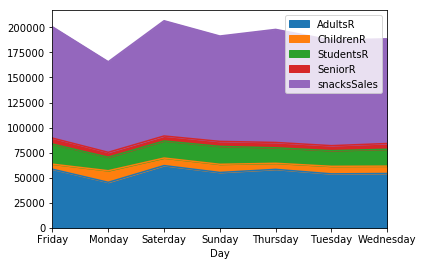

In [17]:
dfTotalEach.plot.area()

## Snack Revenue Group by Branch

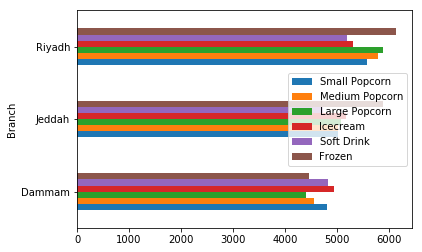

In [18]:
snackSelect = snackSet[['Branch','Small Popcorn','Medium Popcorn','Large Popcorn','Icecream','Soft Drink','Frozen']]
snackSelect.groupby(by=["Branch"]).sum().plot.barh()

# Number of sales for each snack in all branches

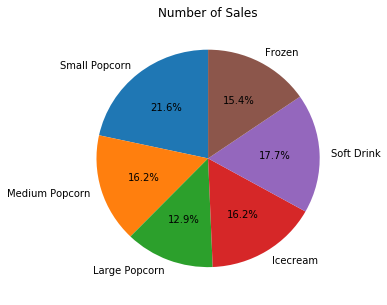

In [19]:
# Specify facecolor when creating the figure
fig, ax = plt.subplots(facecolor='white')
NumbersOfSnacks= snackSet[['Small Popcorn','Medium Popcorn','Large Popcorn','Icecream','Soft Drink','Frozen']]
prices= [6, 8, 10, 8, 7, 9]
NumbersOfSnacks= NumbersOfSnacks.sum()/prices
NumbersOfSnacks.plot(kind='pie', title='Number of Sales',startangle=90, label='' ,subplots=False,
figsize=(5,5), autopct='%1.1f%%')

## Number of Visitor for Each Branch

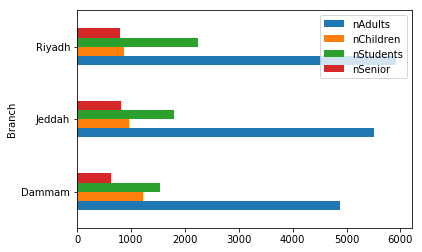

In [20]:
visitorBranch  = visitorSet.groupby(by=["Branch"]).sum()
visitorBranch = visitorBranch[["nAdults", "nChildren", "nStudents", "nSenior"]]
visitorBranch.plot.barh()

# Total Revenue by Branch

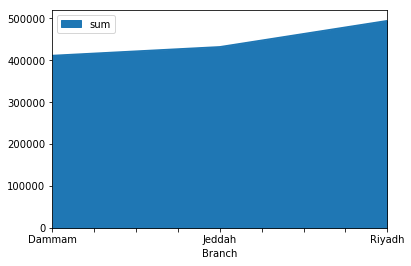

In [21]:
totalRevenueByBranch = revenueSet.groupby(["Branch"]).sum()
totalRevenueByBranch['sum'] = totalRevenueByBranch.sum(axis=1)
totalRevenueByBranch[["sum"]]
totalRevenueByBranch[["sum"]].plot.area()

# Total Profit by branch

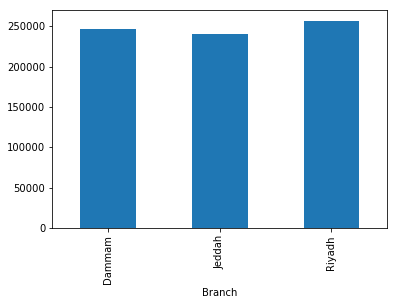

In [22]:
totalCostByBranch = costSet.groupby(["Branch"]).sum()
totalProfitByBranch= totalRevenueByBranch['sum'] - totalCostByBranch.sum(axis=1)
totalProfitByBranch.plot.bar()


# The total revenues grouped by the cost and profit

[164045 191355 237380] [247147.  240517.5 256641. ]


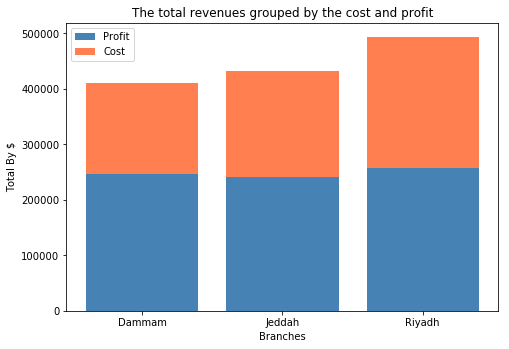

In [23]:
c= np.array(totalCostByBranch[["Cost"]]).flatten()
p=np.array(totalProfitByBranch)
print(c,p)
ind = ['Dammam', 'Jeddah', 'Riyadh']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, p, color='steelblue')
ax.bar(ind, c, bottom=p, color='coral')
ax.set_ylabel('Total By $')
ax.set_xlabel('Branches')
ax.set_title('The total revenues grouped by the cost and profit')
ax.legend(labels=['Profit', 'Cost'])
plt.show()